In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/datasetpr.xls')

X1 = df.loc[:, ['Ws_2']].values
X2 = df.loc[:, ['DirpWave_1', 'WDir_2']].values
X3 = df.loc[:, ['Hs_pre']].values
y = df.loc[:, ['Hs']].values

scaler1 = StandardScaler().fit(X1)
X1 = scaler1.transform(X1)
scaler2 = StandardScaler().fit(X2)
X2 = scaler2.transform(X2)
scaler3 = StandardScaler().fit(X3)
X3 = scaler3.transform(X3)
scaler4 = StandardScaler().fit(y)
y = scaler4.transform(y)

X = np.hstack((X1, X2, X3))

X_test = X[20461:26307]
y_test = y[20461:26307].ravel()
X_train = np.concatenate((X[0:20460], X[26308:]), axis=0)
y_train = np.concatenate((y[0:20460], y[26308:]), axis=0).ravel()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# create RBF layer
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
pipeline = make_pipeline(kmeans)
pipeline.fit(X_train)
rbf_features = pipeline.transform(X_train)

In [ ]:
# create MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(10,15,10,10), activation='relu', solver='lbfgs', max_iter=500)

In [ ]:
# set RBF features as input to MLP model
X_train_rbf = np.hstack([X_train, rbf_features])
mlp_model.fit(X_train_rbf, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(10, 15, 10, 10), max_iter=500, solver='lbfgs')

In [ ]:
# apply RBF transformation to test data
rbf_features_test = pipeline.transform(X_test)
X_test_rbf = np.hstack([X_test, rbf_features_test])


In [ ]:
# predicting on the testing set
y_pred = mlp_model.predict(X_test_rbf)


In [ ]:
# reverse scaling of y data
y_pred = scaler4.inverse_transform(y_pred.reshape(-1,1))
y_test = scaler4.inverse_transform(y_test.reshape(-1,1))


In [ ]:
# calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# calculating the scatter index (SI)
mean = np.mean(X_test)
si = rmse / mean

# calculating the bias
bias = np.mean(y_pred) - np.mean(y_test)

print('RMSE of MLPRegressor with RBF model:', rmse)
print('SI of MLPRegressor with RBF model:', si)
print('Bias of MLPRegressor with RBF model:', bias)

RMSE of MLPRegressor with RBF model: 0.0644216821099362
SI of MLPRegressor with RBF model: 2.669144430080914
Bias of MLPRegressor with RBF model: -4.676845684442599e-05


In [ ]:
import scipy.stats as stats
y_test = y_test.ravel()
y_pred = y_pred.ravel()

r, p_value = stats.pearsonr(y_test, y_pred)

print("Pearson correlation coefficient of testing data:", r)

Pearson correlation coefficient of testing data: 0.9951496496642307


In [ ]:
# predicting on the testing set
y_pred_train = mlp_model.predict(X_train_rbf)

# reverse scaling of y data
y_pred_train = scaler4.inverse_transform(y_pred_train.reshape(-1,1))
y_train = scaler4.inverse_transform(y_train.reshape(-1,1))

In [ ]:

y_train = y_train.ravel()
y_pred_train = y_pred_train.ravel()

R_train, p_value = stats.pearsonr(y_pred_train, y_train)

print("Pearson correlation coefficient of training:", R_train)

Pearson correlation coefficient of training: 0.9944793758158372


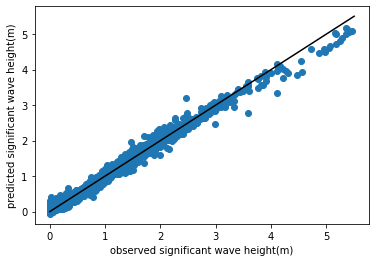

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

# set the x and y axis labels
plt.xlabel('observed significant wave height(m)')
plt.ylabel('predicted significant wave height(m)')

x=np.linspace(0,5.5,100)
y=x
plt.plot(x, y,color='k')
# display the plot
plt.show()



array([[3.48331928, 0.45930032, 4.72932019, ..., 2.52533677, 2.91906173,
        3.75056322],
       [2.96193311, 0.85288918, 4.0199587 , ..., 2.08018201, 2.43527329,
        3.07012968],
       [2.9114016 , 0.51020892, 4.02901129, ..., 1.97709388, 2.3607449 ,
        3.08970901],
       ...,
       [3.3719887 , 0.92905471, 5.05572245, ..., 2.42269966, 3.15779106,
        3.89488931],
       [3.11040683, 1.54062588, 4.99144974, ..., 2.27835507, 3.49706351,
        3.74110414],
       [3.33980871, 0.58238915, 4.86799622, ..., 2.37550403, 3.02742463,
        3.76448001]])

array([[-0.60013888, -1.86792807, -1.66929139, -0.77048796],
       [ 0.03047922, -1.27567175, -1.46819054, -0.71941997],
       [-0.47552573, -1.27567175, -1.47930667, -0.27683076],
       ...,
       [-1.55173027, -1.86792807, -1.22161462, -0.77048796],
       [-1.79340427, -1.86792807, -0.46268629, -0.78751062],
       [-1.14012923, -1.86792807, -1.34490258, -0.78751062]])